In [2]:
import pandas as pd

datapath = '../LPOINT_BIG_COMP/'
demo = pd.DataFrame(pd.read_csv(datapath+'LPOINT_BIG_COMP_01_DEMO.csv')).sort_values('cust') #고객 데모, 29913 rows, 중복x
pdde = pd.DataFrame(pd.read_csv(datapath+'LPOINT_BIG_COMP_02_PDDE.csv')).sort_values('cust')  #상품 구매정보, 중복 o
# copu = pd.DataFrame(pd.read_csv(datapath+'LPOINT_BIG_COMP_03_COP_U.csv')).sort_values('cust')  #제휴사 이용정보, 중복x
pdcl = pd.DataFrame(pd.read_csv(datapath+'LPOINT_BIG_COMP_04_PD_CLAC.csv')) #상품 분류정보
br = pd.DataFrame(pd.read_csv(datapath+'LPOINT_BIG_COMP_05_BR.csv'))  #점포정보
# lpay = pd.DataFrame(pd.read_csv(datapath+'LPOINT_BIG_COMP_06_LPAY.csv')).sort_values('cust').rename(columns={'rct_no' : 'lpay_rct_no'})  #엘페이 이용, 중복x

C:\Users\jh_r_\AppData\Local\Temp\ipykernel_4832\1888109994.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  pdde = pd.DataFrame(pd.read_csv(datapath+'LPOINT_BIG_COMP_02_PDDE.csv')).sort_values('cust')  #상품 구매정보, 중복 o


In [48]:
z = list(tbl_pdde.groupby(['cust']).count()['rct_no'])# 고객별 구매 횟수(영수증의 수)
print (z.index(12448))
print (z.index(10049))

1566
24856


In [53]:
z[1566] = 0
z[24856] = 0
pd.DataFrame(z).describe(percentiles=[0.999])

0
count  26917.000000
mean     162.787198
std      227.442772
min        1.000000
50%       88.000000
99.9%   1537.772000
max    12448.000000

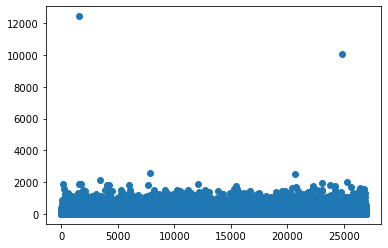

In [29]:
import matplotlib.pyplot as plt

plt.scatter(range(len(z)),z)

In [32]:
import pandas as pd
pd.DataFrame(z).describe()

0
count  26917.000000
mean     162.787198
std      227.442772
min        1.000000
25%       30.000000
50%       88.000000
75%      214.000000
max    12448.000000

### 비율 별 알고리즘 사용

1. 상위 25%까지 (~214회 이상) -> apriori : ncf =  6 : 3 (순서 ap -> ncf 순)
2. 상위 25%~ 50% (214회 미만 88회 이상) -> apriori : ncf =  5 : 4 (순서 ap -> ncf 순)
3. 상위 50%~ 75% (88회 미만 30회 이상) -> apriori : ncf =  4 : 5 (순서 셔플)
4. 상위 75% ~ (~30회 미만) -> apriori : ncf =  3 : 6 (순서 셔플)
5. 구매횟수 0 -> gun


In [20]:
import numpy as np
np.percentile(list(tbl_pdde.groupby(['cust']).count()['rct_no']),25)

30.0

In [3]:
tbl_pdde = pdde
tbl_pd_clac = pdcl
tbl_demo = demo

In [4]:
cust_id = 'M035502859'
cust_tmp = pd.merge(left=tbl_pdde[tbl_pdde.cust == cust_id], right=tbl_pd_clac, on='pd_c')
list_pd = cust_tmp.groupby('rct_no')['pd_nm'].apply(list) #같은 영수증
dataset = list(list_pd)

In [5]:
cust_tmp # cust id에 해당하는 고객의 구매 내역

cust        rct_no  chnl_dv cop_c     br_c    pd_c     de_dt  \
0    M035502859  A01349567845        1   A01  A010014  PD0772  20210916   
1    M035502859  A01349567845        1   A01  A010014  PD0772  20210916   
2    M035502859  A01349567845        1   A01  A010014  PD0772  20210916   
3    M035502859  A01349567845        1   A01  A010014  PD0772  20210916   
4    M035502859  A01344028118        1   A01  A010004  PD1684  20210912   
..          ...           ...      ...   ...      ...     ...       ...   
369  M035502859  A01169002981        1   A01  A010014  PD1094  20210507   
370  M035502859  A01153798763        1   A01  A010045  PD1769  20210428   
371  M035502859  A01334213747        1   A01  A010066  PD0038  20210905   
372  M035502859  A04033453284        1   A04  A043744  PD0332  20210502   
373  M035502859  A01018289906        1   A01  A010014  PD0768  20210117   

     de_hr    buy_am  buy_ct     pd_nm clac_hlv_nm clac_mcls_nm  
0       20   79000.0       1    남성등산바지       스포츠패션  남성등산/아웃도어의류  
1       20   79000.0       1    남성등산바지       스포츠패션  남성등산/아웃도어의류  
2       20   79000.0       1    남성등산바지       스포츠패션  남성등산/아웃도어의류  
3       20   77000.0       1    남성등산바지       스포츠패션  남성등산/아웃도어의류  
4       16    5000.0       2        양식     테넌트/음식점           식당  
..     ...       ...     ...       ...         ...          ...  
369     17   99000.0       1      남아바지       유아동의류       남아의류하의  
370     16   70800.0       1  여성가방액세서리        패션잡화         여성가방  
371     18  279000.0       1       혼합즙        건강식품         건강진액  
372     21    4800.0       1    컵아이스크림        냉동식품        아이스크림  
373     18  258000.0       1  남성골프의류세트       스포츠패션       남성골프의류  

[374 rows x 13 columns]

In [19]:
import itertools
s = list(itertools.chain(*dataset))
len(s)

374

In [8]:
dataset #해당 고객이 구매한 상품의 소분류
cust_num = len(dataset) #구매 횟수

In [9]:
cust_num

247